<a href="https://colab.research.google.com/github/mmandelli/soft-test/blob/master/myPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch


In [6]:
# Create a Tensor with just ones in a column
a = torch.ones(5)
# Print the tensor we created
print(a)
# Create a Tensor with just zeros in a column
b = torch.zeros(5)
print(b)
c = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
print(c)

tensor([1., 1., 1., 1., 1.])
tensor([0., 0., 0., 0., 0.])
tensor([1., 2., 3., 4., 5.])


In [9]:
d = torch.zeros(3,2)
print(d)
print(d.shape)
f = torch.tensor([[1.0, 2.0],[3.0, 4.0]])
print(f)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
torch.Size([3, 2])
tensor([[1., 2.],
        [3., 4.]])


In [13]:
# Get element at index 2
print(c[3])
# Get element at row 1, column 0
print(f[1,0])
# We can also use the following
print(f[1][0])
print(f[:])

tensor(4.)
tensor(3.)
tensor(3.)
tensor([[1., 2.],
        [3., 4.]])


In [0]:
# Create tensor
tensor1 = torch.tensor([[1,2,3],[4,5,6]])
tensor2 = torch.tensor([[-1,2,-3],[4,-5,6]])

In [15]:
# Addition
print(tensor1+tensor2)
# We can also use
print(torch.add(tensor1,tensor2))

tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 0,  4,  0],
        [ 8,  0, 12]])


In [16]:
# Subtraction
print(tensor1-tensor2)
# We can also use
print(torch.sub(tensor1,tensor2))

tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])


In [18]:
# Create a tensor for CPU
# This will occupy CPU RAM
tensor_cpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cpu')
print(tensor_cpu)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [20]:
# Create a tensor for GPU
# This will occupy GPU RAM
tensor_gpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cuda')
print(tensor_gpu)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], device='cuda:0')


In [0]:
# This uses CPU RAM
tensor_cpu = tensor_cpu * 5
# This uses GPU RAM
# Focus on GPU RAM Consumption
tensor_gpu = tensor_gpu * 5
# Move GPU tensor to CPU
tensor_gpu_cpu = tensor_gpu.to(device='cpu')
# Move CPU tensor to GPU
tensor_cpu_gpu = tensor_cpu.to(device='cuda')

In [4]:
from torchvision import models
import torch
 
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'Inception3',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mobilenet',
 'mobilenet_v2',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn']

In [0]:
alexnet = models.alexnet(pretrained=True)

In [6]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [0]:
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

In [7]:
!pip uninstall -y Pillow
# install the new one
!pip install Pillow==5.3.0
# import the new one
import PIL
print(PIL.PILLOW_VERSION)

Uninstalling Pillow-4.0.0:
  Successfully uninstalled Pillow-4.0.0
  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


4.0.0


In [0]:
import torchvision
import torch

In [14]:
# we need pillow version of 5.3.0
# we will uninstall the older version first
!pip uninstall -y Pillow
# install the new one
!pip install Pillow==5.3.0
# import the new one
import PIL
print(PIL.PILLOW_VERSION)
# this should print 5.3.0. If it doesn't, then restart your runtime:
# Menu > Runtime > Restart Runtime

Uninstalling Pillow-5.3.0:
  Successfully uninstalled Pillow-5.3.0
  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


4.0.0


In [1]:
import PIL
print(PIL.PILLOW_VERSION)

5.3.0


In [0]:
import PIL
from PIL import Image

In [0]:
alexnet = models.alexnet(pretrained=True)


In [0]:
from google.colab import files

In [29]:
up = files.upload()

Saving dog.jpg to dog.jpg


In [0]:
# Import Pillow
from PIL import Image
img = Image.open("dog.jpg")


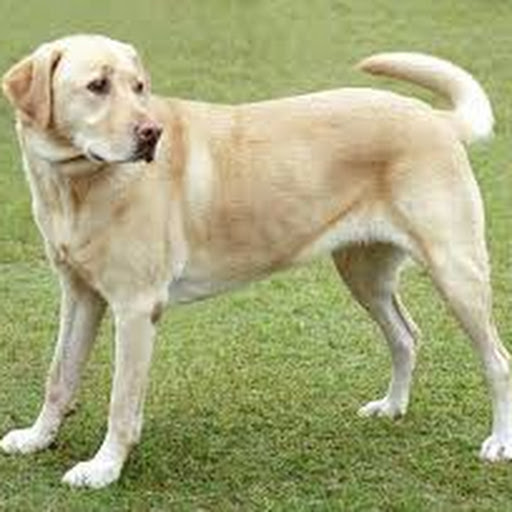

In [33]:
img

In [0]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

In [36]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [40]:
out = alexnet(batch_t)
print(out.shape)


torch.Size([1, 1000])


FileNotFoundError: ignored

In [0]:
import urllib.request

url='https://github.com/Cadene/pretrained-models.pytorch/blob/master/data/imagenet_classes.txt'
data = urllib.request.urlopen(url)


In [53]:
with open(url) as f:
  classes = [line.strip() for line in f.readlines()]

FileNotFoundError: ignored

In [49]:
url

'https://github.com/Cadene/pretrained-models.pytorch/blob/master/data/imagenet_classes.txt'